Introduction to Computer Vision
Summer Semester 2022, 03.05.2022 and 10.05.2022 , Otto von Guericke University Magdeburg.

3. Exercise - Textures
In this exercise, we will again work with the car racing environment from Gym. Our goal is to apply different computer vision approaches to the simulator.

The goal of this exercise is to generate different filter banks for texture extraction on the generated data. For this purpose, the generated images from the last assignment can be used. First, the OpenCV functions are used for the filter bank implementation. Then, the filter banks should be implemented without using the OpenCV package.

Important: You need to install Gym in your system. The installation can be done with pip or by installing from the sources. More information at https://gym.openai.com/docs/#installation.

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

A. Gabor Filter Bank OpenCV
In this exercise, the Gabor filter bank should be implemented. The Gabor filter is a linear filter used to analyse textures. The filter bank should cover different orientations and scales. Therefore, use the OpenCV function getGaborKernel to generate the Gabor kernel. Use different values for ksize and theta to define the filter bank at differnt scales and orientions. Then, apply the Gabor filter bank to the generated data samples by using the OpenCV function filter2D with the defined Gabor kernels. Visualize the different filters and the results when the filters are applied to the generated images.

Example: http://amroamroamro.github.io/mexopencv/opencv/gabor_demo.html

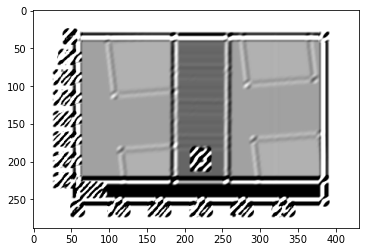

In [3]:
##Gabor filter Implementation

import numpy as np
import cv2
import matplotlib.pyplot as plt
ksize = 15 
sigma = 5
theta = 1*np.pi/4  
lamda = 1*np.pi/4   
gamma=0.9  
phi = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

img = cv2.imread('img_tbused.png', cv2.IMREAD_GRAYSCALE)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image


plt.imshow(kernel_resized)
plt.imshow(fimg, cmap='gray')
cv2.imshow('Kernel', kernel_resized)
cv2.imshow('Original Img.', img)
cv2.imshow('Filtered', fimg)
cv2.waitKey()
cv2.destroyAllWindows()


In [4]:
##Gabor Filter Bank Implementation
import numpy as np
import cv2
import pandas as pd
img = cv2.imread('img_tbused.png', cv2.IMREAD_GRAYSCALE)

#stores the pixels of the original image in a dataframe and it is reshaped
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

filternum = 1
kernels = []
for theta in range(4):  
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5):  #Sigma with values of 1 ,3 and 5
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(filternum)  #Label Gabor columns as Gabor1, Gabor2, etc.

                ksize=5  
                phi = 0  
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                filternum += 1

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

B. Gabor Filter Bank
Now, the Gabor filter bank should be implemented without the OpenCV package. Again, visualize the different filters and the results when the filters are applied to the generated images.

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

def myshow(I, **kwargs):
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

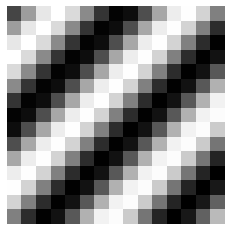

In [8]:
def genSinusoid(ksize, A, omega, rho):
    radius = (int(ksize[0]/2.0), int(ksize[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1)) 

    stimuli = A * np.cos(omega[0] * x  + omega[1] * y + rho)
    return stimuli

theta = np.pi/4
omega = [np.cos(theta), np.sin(theta)]
sinusoidParam = {'A':1, 'omega':omega, 'rho':np.pi/2, 'ksize':(15,15)}
myshow(genSinusoid(**sinusoidParam)) 

0.040434860818249235

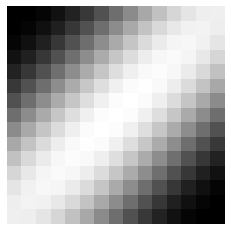

In [11]:
def genGabor(ksize, omega, theta, func=np.cos, K=np.pi):
    radius = (int(ksize[0]/2.0), int(ksize[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((15,15), 0.3, np.pi/4, func=np.cos) 
myshow(g)
np.mean(g)

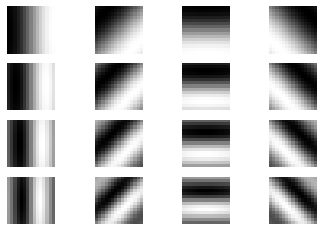

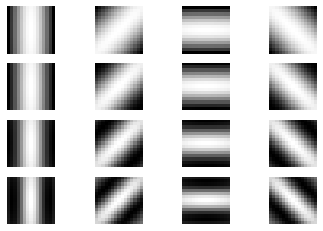

In [12]:
theta = np.arange(0, np.pi, np.pi/4) 
omega = np.arange(0.2, 0.6, 0.1)
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'ksize':(15, 15)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

plt.figure()
n = len(sinFilterBank)
for i in range(n):
    plt.subplot(4,4,i+1)
    plt.axis('off'); plt.imshow(sinFilterBank[i])

plt.figure()
for i in range(n):
    plt.subplot(4,4,i+1)
    plt.axis('off'); plt.imshow(cosFilterBank[i])

<ipython-input-15-22c9cffd3068>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  zebra = rgb2gray(plt.imread('C:\\Users\\pravi\\Desktop\\CV exercises\\img_tbused.png'))


<Figure size 432x288 with 0 Axes>

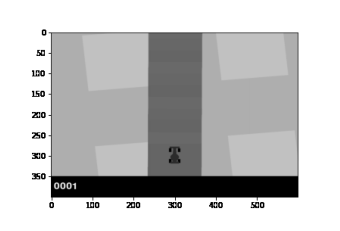

<Figure size 432x288 with 0 Axes>

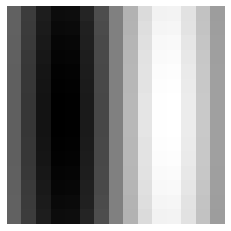

<Figure size 432x288 with 0 Axes>

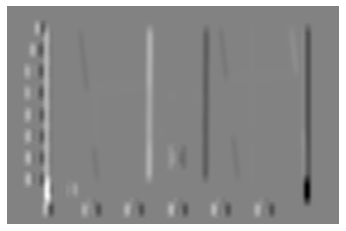

In [15]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
zebra = rgb2gray(plt.imread('img_tbused.png'))
plt.figure(); 
myshow(zebra)
sinGabor = sinFilterBank[8] 
plt.figure()
myshow(sinGabor)
result = convolve2d(zebra, sinGabor, mode='valid')
plt.figure()
myshow(result); 

C. Leung-Malik Filter Bank
In this exercise, the Leung-Malik filter bank should be implemented. The Leung-Malik filter bank contains 48 filters of different scales and rotations. It consists of first and second order derivatives of Gaussians at 6 orientations and 3 scales. Use different values for the kernel size and sigma to define the filter bank at different scales and orientions. Finally, apply the Leung-Malik filter bank to the generated data samples. Visualize the different filters and the results when the filters are applied to the generated images.

Example: https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))

    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g

def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h

def makefilter(scale, phasex, phasey, pts, sup):

    gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian1d(scale,   0, pts[1,...], phasey)

    image = gx*gy

    image = np.reshape(image,(sup,sup))
    return image

def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)

    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c+0,-s+0],[s+0,c+0]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1

    count = nbar+nedge
    scales = np.sqrt(2) * np.array([1,2,3,4])

    for i in range(len(scales)):
        F[:,:,count]   = gaussian2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1

    return F

# Call the make filter function
F = makeLMfilters()

In [6]:
import numpy as np
import cv2
import pandas as pd
img = cv2.imread('img_tbused.png', cv2.IMREAD_GRAYSCALE)
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2



for i in range(0,48):
    lm_label = 'LM' + str(i) 
    fimg = cv2.filter2D(img2, cv2.CV_8UC3, F[:,:,i])                
    filtered_img = fimg.reshape(-1)
                
    cv2.imwrite('leung_malik_filtered_images/'+lm_label+'.jpg', filtered_img.reshape(img.shape))